In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import imagehash
import cv2
from PIL import Image
import shutil

pjoin = os.path.join
pdcsv = pd.read_csv
splot = sns.histplot
data_dirs = list(map(lambda s: "../data/"+s, os.listdir('../data')))
# COVID_HASHES = []

def label_folder(root, df, label_col):
    labels = set(df[label_col])
    for l in labels:
        l = l.strip()
        for i, row in df[df[label_col] == l].iterrows():
            src = pjoin('images', row['filename'])
            dst = pjoin('images', l)
            if ".nii.gz" in src:
                continue
            os.makedirs(pjoin(root, dst), exist_ok=True)
            dst = pjoin(dst, row['filename'])
            print(src, dst)
            shutil.copy(pjoin(root,src), pjoin(root, dst))

def get_hash(path):
    # data_dirs[0] +'/images/'+ df.iloc[2]['filename']
    img = Image.open(path).resize((1024,1024))
    return str(imagehash.dhash(img, hash_size=32))

def remove_duplicate(root, df, out_file):
    # all_hashes = set()
    count = 0
    drop = []
    for i, fp in enumerate(df['filepath']):
        if not os.path.exists(root+fp):
            continue
        h = get_hash(root+fp)
        if h in all_hashes:
            drop.append(i)
            print(fp)
            print(COVID_HASHES.index(h))
            os.remove(root+fp)
            count += 1
            continue
        COVID_HASHES.append(h)
    clean_df = df.drop(drop)
    clean_df.to_csv(pjoin(root, out_file), index=False)
    print(count)
    return clean_df

## All data

In [11]:
DATA_DIR = "../data/10_all_data_foldered/images"

def remove_duplicate(root):
    count = 0
    for l in os.listdir(root):
        if l in ['bacterial_pneumonia', 'Others']:
            continue
        label_f = pjoin(root, l)
        hashes = []
        for f in os.listdir(label_f):
            filename = pjoin(label_f, f)
            if '.ini' in filename or '.csv' in filename:
                continue
            h = get_hash(filename)
            if h in hashes:
                print(filename)
                os.remove(filename)
                count += 1
                continue
            hashes.append(h)

In [14]:
len("""
../data/10_all_data_foldered/images\covid\COVID-19(1).png
../data/10_all_data_foldered/images\covid\COVID-19(10).png
../data/10_all_data_foldered/images\covid\COVID-19(11).png
../data/10_all_data_foldered/images\covid\COVID-19(12).png
../data/10_all_data_foldered/images\covid\COVID-19(13).png
../data/10_all_data_foldered/images\covid\COVID-19(16).png
../data/10_all_data_foldered/images\covid\COVID-19(17).png
../data/10_all_data_foldered/images\covid\COVID-19(178).png
../data/10_all_data_foldered/images\covid\COVID-19(184).png
../data/10_all_data_foldered/images\covid\COVID-19(2).png
../data/10_all_data_foldered/images\covid\COVID-19(20).png
../data/10_all_data_foldered/images\covid\COVID-19(205).png
../data/10_all_data_foldered/images\covid\COVID-19(21).png
../data/10_all_data_foldered/images\covid\COVID-19(22).png
../data/10_all_data_foldered/images\covid\COVID-19(3).png
../data/10_all_data_foldered/images\covid\COVID-19(5).png
../data/10_all_data_foldered/images\covid\COVID-19(6).png
../data/10_all_data_foldered/images\covid\COVID-19(8).png
../data/10_all_data_foldered/images\covid\COVID-19(9).png
../data/10_all_data_foldered/images\covid\covid-19-pneumonia-14-PA.png
../data/10_all_data_foldered/images\covid\covid-19-pneumonia-15-PA.jpg
../data/10_all_data_foldered/images\covid\covid-19-pneumonia-19.jpg
../data/10_all_data_foldered/images\covid\covid-19-pneumonia-2.jpg
../data/10_all_data_foldered/images\covid\covid-19-pneumonia-7-PA.jpg
../data/10_all_data_foldered/images\covid\D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg
../data/10_all_data_foldered/images\covid\figure1-5e71be566aa8714a04de3386-98-left.jpeg
../data/10_all_data_foldered/images\covid\figure1-5e73d7ae897e27ff066a30cb-98.jpeg
../data/10_all_data_foldered/images\covid\figure1-5e75d0940b71e1b702629659-98-right.jpeg
../data/10_all_data_foldered/images\covid\gr1_lrg-b.jpg
../data/10_all_data_foldered/images\covid\image--000(1).jpg
../data/10_all_data_foldered/images\covid\image--000(3).jpg
../data/10_all_data_foldered/images\covid\image--000(5).jpg
../data/10_all_data_foldered/images\covid\image--000.jpg
../data/10_all_data_foldered/images\covid\image--003(1).jpg
../data/10_all_data_foldered/images\covid\image--003(2).jpg
../data/10_all_data_foldered/images\covid\image--003.jpg
../data/10_all_data_foldered/images\covid\image--004(4).jpg
../data/10_all_data_foldered/images\covid\image--004(5).jpg
../data/10_all_data_foldered/images\covid\image--014(4).jpg
../data/10_all_data_foldered/images\covid\image--022.png
../data/10_all_data_foldered/images\covid\image--023(1).jpg
../data/10_all_data_foldered/images\covid\image--023(3).jpg
../data/10_all_data_foldered/images\covid\image--028(3).jpg
../data/10_all_data_foldered/images\covid\image--029(2).jpg
../data/10_all_data_foldered/images\covid\image--034(1).jpg
../data/10_all_data_foldered/images\covid\image--036.png
../data/10_all_data_foldered/images\covid\image--037(1).jpg
../data/10_all_data_foldered/images\covid\image--040.jpg
../data/10_all_data_foldered/images\covid\image--041.jpg
../data/10_all_data_foldered/images\covid\image--042.jpg
../data/10_all_data_foldered/images\covid\image--043.jpg
../data/10_all_data_foldered/images\covid\image--046(2).jpg
../data/10_all_data_foldered/images\covid\image--049(1).jpg
../data/10_all_data_foldered/images\covid\image--050(2).jpg
../data/10_all_data_foldered/images\covid\image--051(2).jpg
../data/10_all_data_foldered/images\covid\image--052.jpg
../data/10_all_data_foldered/images\covid\image--053.jpg
../data/10_all_data_foldered/images\covid\image--054.jpg
../data/10_all_data_foldered/images\covid\image--060.jpg
../data/10_all_data_foldered/images\covid\jkms-35-e79-g001-l-a.jpg
../data/10_all_data_foldered/images\covid\jkms-35-e79-g001-l-b.jpg
../data/10_all_data_foldered/images\covid\jkms-35-e79-g001-l-c.jpg
../data/10_all_data_foldered/images\covid\kjr-21-e24-g001-l-a.jpg
../data/10_all_data_foldered/images\covid\kjr-21-e24-g002-l-a.jpg
../data/10_all_data_foldered/images\covid\kjr-21-e25-g001-l-a.jpg
../data/10_all_data_foldered/images\covid\nCoV-radiol.2020200269.fig1-day7.jpeg
../data/10_all_data_foldered/images\covid\nejmc2001573_f1b.jpeg
../data/10_all_data_foldered/images\covid\nejmoa2001191_f1-PA.jpeg
../data/10_all_data_foldered/images\covid\nejmoa2001191_f3-PA.jpeg
../data/10_all_data_foldered/images\covid\nejmoa2001191_f4.jpeg
../data/10_all_data_foldered/images\covid\nejmoa2001191_f5-PA.jpeg
../data/10_all_data_foldered/images\covid\p1_image--000.jpg
../data/10_all_data_foldered/images\covid\p1_image--004.jpg
../data/10_all_data_foldered/images\covid\p1_image--011.jpg
../data/10_all_data_foldered/images\covid\p1_image--016.jpg
../data/10_all_data_foldered/images\covid\p1_image--018.jpg
../data/10_all_data_foldered/images\covid\p1_image--024.jpg
../data/10_all_data_foldered/images\covid\p1_image--028.jpg
../data/10_all_data_foldered/images\covid\p1_image--032.jpg
""".split('\n'))

87

In [12]:
remove_duplicate(DATA_DIR)

../data/10_all_data_foldered/images\covid\COVID-19(1).png
../data/10_all_data_foldered/images\covid\COVID-19(10).png
../data/10_all_data_foldered/images\covid\COVID-19(11).png
../data/10_all_data_foldered/images\covid\COVID-19(12).png
../data/10_all_data_foldered/images\covid\COVID-19(13).png
../data/10_all_data_foldered/images\covid\COVID-19(16).png
../data/10_all_data_foldered/images\covid\COVID-19(17).png
../data/10_all_data_foldered/images\covid\COVID-19(178).png
../data/10_all_data_foldered/images\covid\COVID-19(184).png
../data/10_all_data_foldered/images\covid\COVID-19(2).png
../data/10_all_data_foldered/images\covid\COVID-19(20).png
../data/10_all_data_foldered/images\covid\COVID-19(205).png
../data/10_all_data_foldered/images\covid\COVID-19(21).png
../data/10_all_data_foldered/images\covid\COVID-19(22).png
../data/10_all_data_foldered/images\covid\COVID-19(3).png
../data/10_all_data_foldered/images\covid\COVID-19(5).png
../data/10_all_data_foldered/images\covid\COVID-19(6).png

### 01 IEE

In [2]:
df = pd.read_csv('../data/01_ieee-covid-chestxray-dataset/metadata.csv')
df['short-finding'] = df['finding'].apply(lambda x: x.split('/')[-1])

In [7]:
xray_accept = df[(df['view'] != 'L') & (df['modality'] =='X-ray')]

In [9]:
root = data_dirs[0]
label_folder(root, xray_accept, 'short-finding')


images\0a6c60063b4bae4de001caaba306d1_jumbo.jpeg images\COVID-19\0a6c60063b4bae4de001caaba306d1_jumbo.jpeg
images\5ed7d0109672bdd3d58a7db7841f6a_jumbo.jpeg images\COVID-19\5ed7d0109672bdd3d58a7db7841f6a_jumbo.jpeg
images\fedd6c94d5dbd12d88c81a1020a3e4_jumbo.jpeg images\COVID-19\fedd6c94d5dbd12d88c81a1020a3e4_jumbo.jpeg
images\14d81f378173b86cc53f21d2d67040_jumbo.jpeg images\COVID-19\14d81f378173b86cc53f21d2d67040_jumbo.jpeg
images\3eaf15de91d4ff55e6fb0e04cadb81_jumbo.jpeg images\COVID-19\3eaf15de91d4ff55e6fb0e04cadb81_jumbo.jpeg
images\a1fec23b293dfe7876660cb7acce43_jumbo.jpeg images\COVID-19\a1fec23b293dfe7876660cb7acce43_jumbo.jpeg
images\78b60346d1b3bce85353b6dc462d75_jumbo.jpeg images\COVID-19\78b60346d1b3bce85353b6dc462d75_jumbo.jpeg
images\c17cdd3972b233b97770bb57f7bba6_jumbo.jpeg images\COVID-19\c17cdd3972b233b97770bb57f7bba6_jumbo.jpeg
images\f44373474437c99b2740062c914438_jumbo.jpeg images\COVID-19\f44373474437c99b2740062c914438_jumbo.jpeg
images\b0f1684d1ee90dc09deef015e29da

&lt;AxesSubplot:xlabel=&#39;short-finding&#39;, ylabel=&#39;Count&#39;&gt;

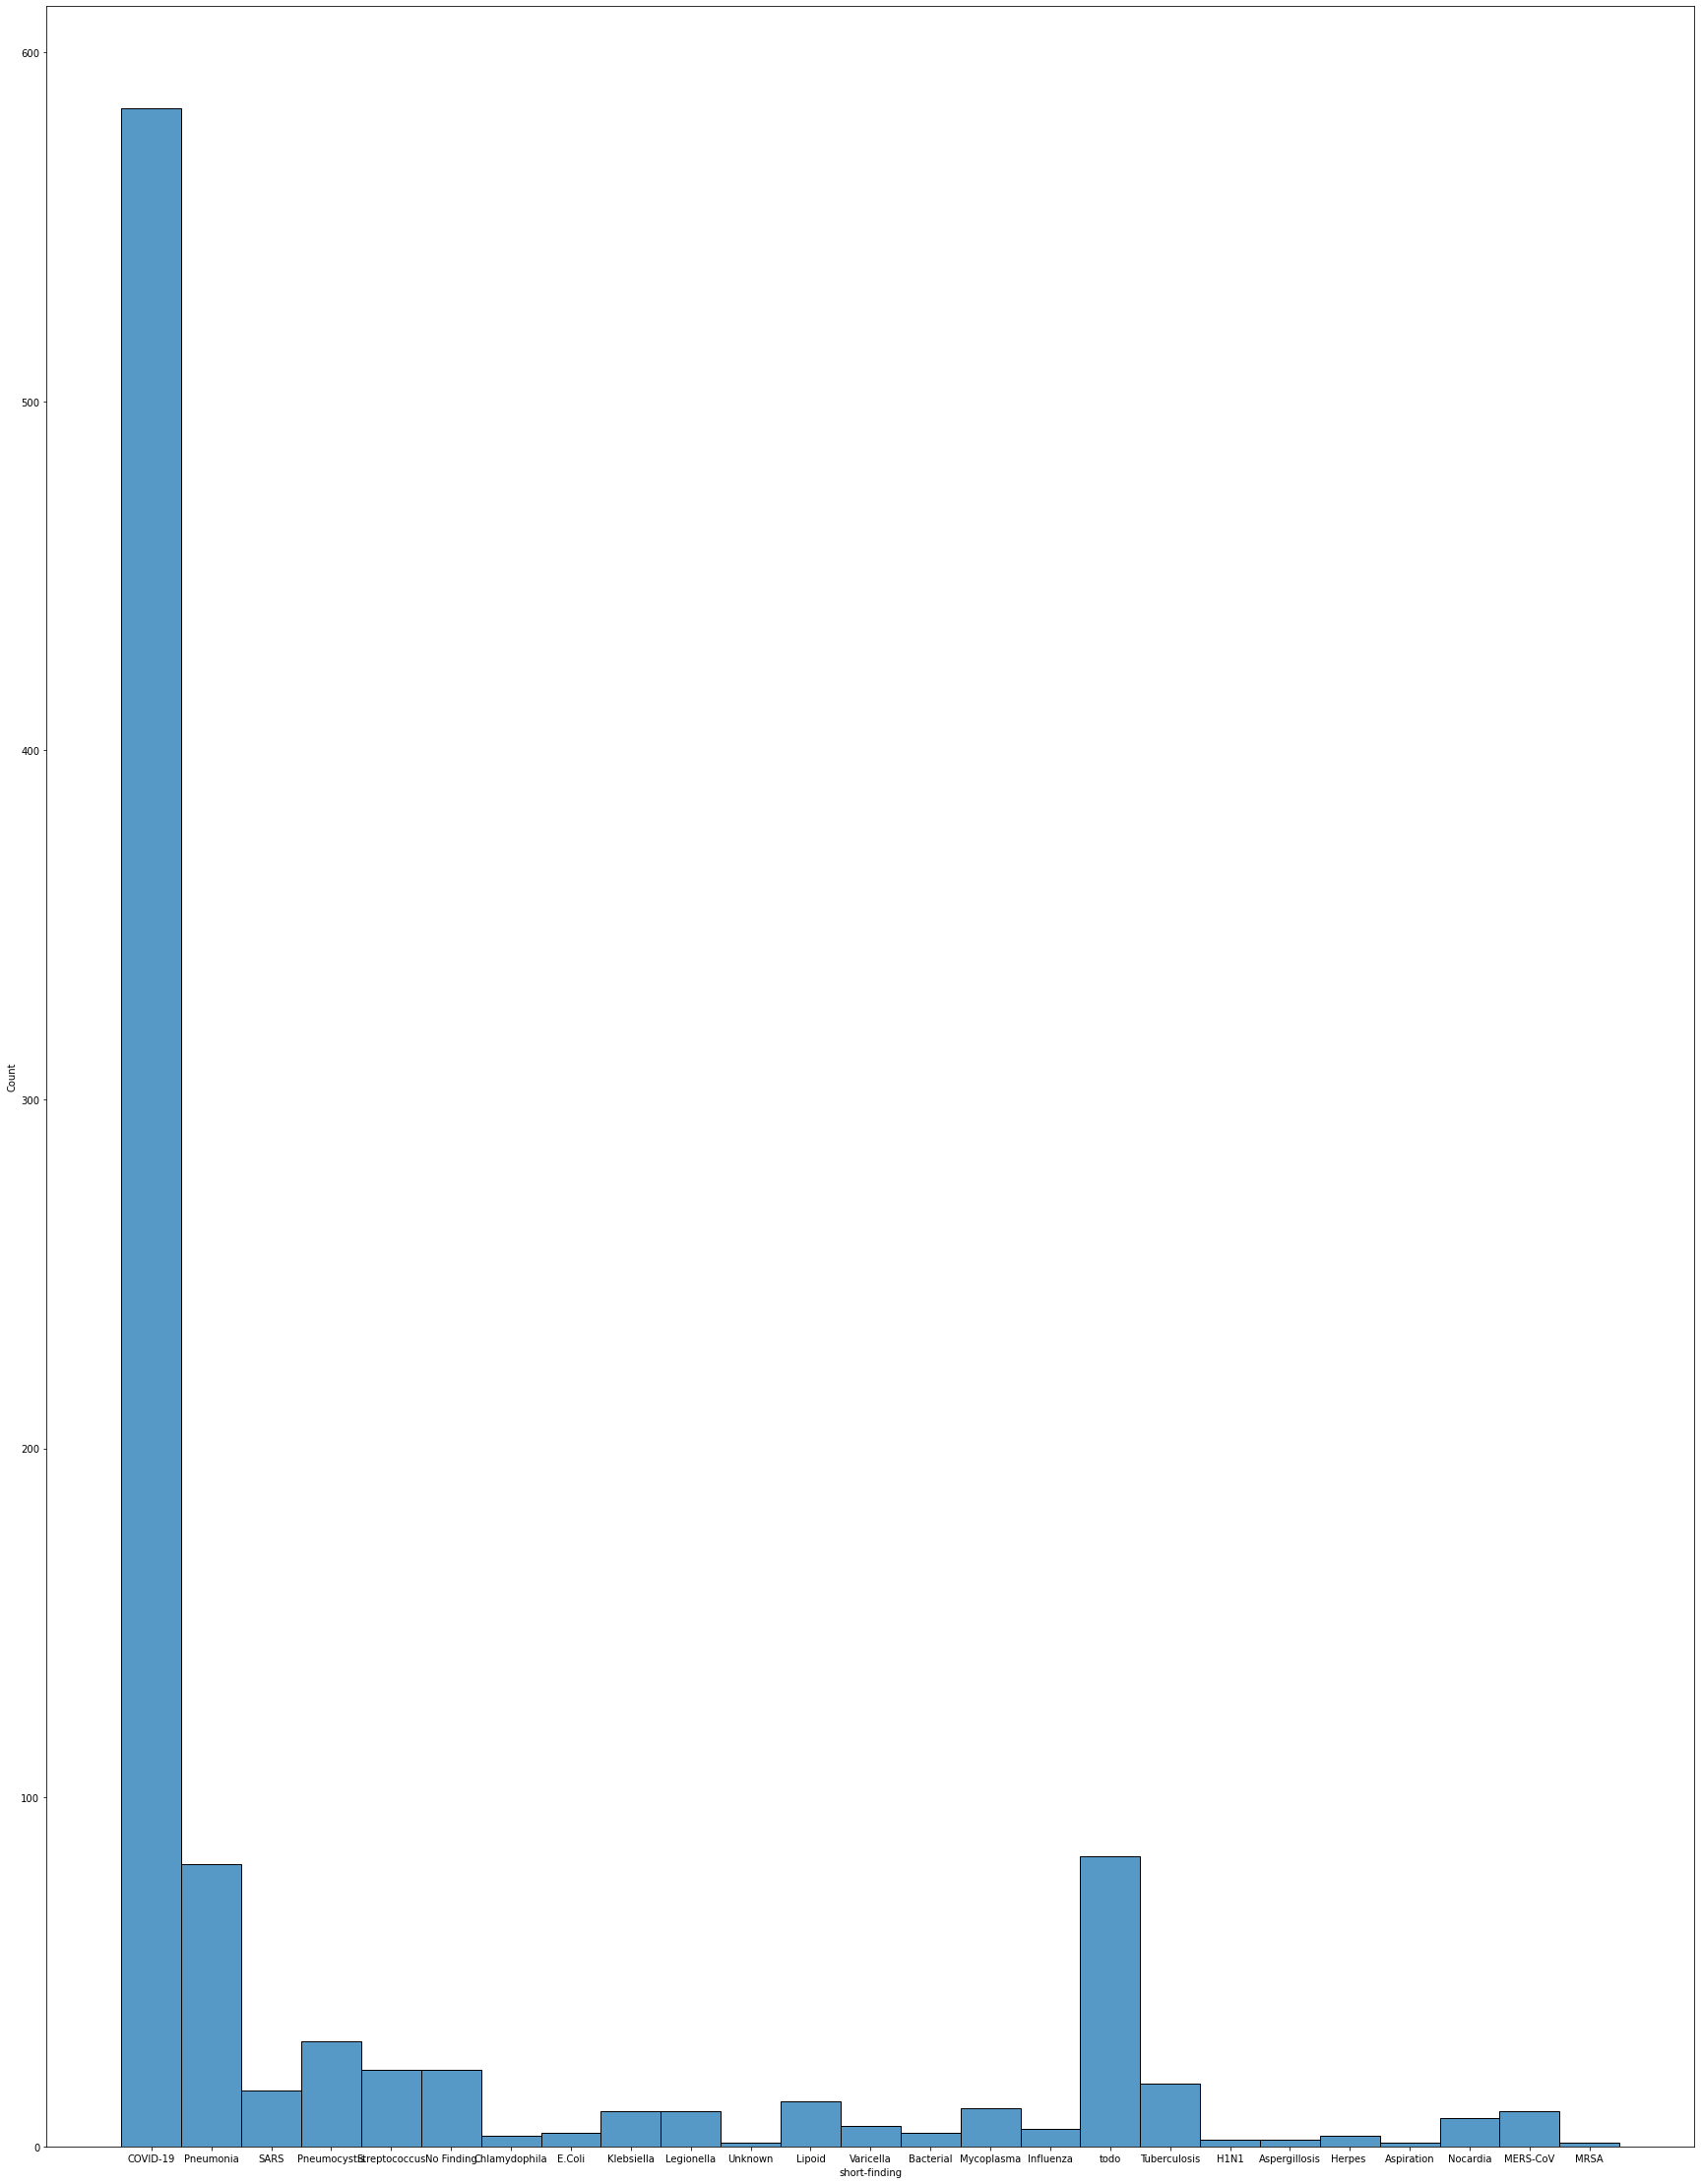

In [21]:
fig = plt.figure(figsize=(30,40))

sns.histplot(df['short-finding'])

### 02 Train, test split

In [29]:
DATA_DIR = "../data/02_COVID-19 Xray Dataset (Train & Test Sets)/"
df2 = pd.read_csv(os.path.join(DATA_DIR, 'data.csv'))

In [23]:
rows = []
for phase in os.listdir(DATA_DIR):
    for label in os.listdir(os.path.join(DATA_DIR, phase)):
        for image in os.listdir(os.path.join(DATA_DIR, phase, label)):
            filepath = os.path.join(phase, label, image)
            rows.append((filepath, label, phase))
df2 = pd.DataFrame(rows, columns=['filename', 'label', 'phase'])
df2.to_csv(os.path.join(DATA_DIR, 'data.csv'), index=False)

&lt;AxesSubplot:xlabel=&#39;label&#39;, ylabel=&#39;Count&#39;&gt;

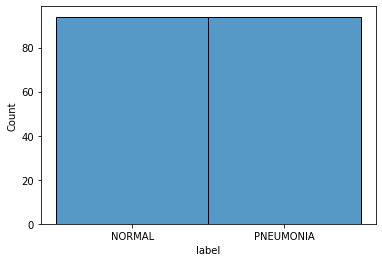

In [31]:
sns.histplot(df2['label'])

### 03 kaggle winner (200, 1200, 1200)

In [102]:
DATA_DIR = "../data/03_covid19_radiography_winner_kaggle_ds/"
df3_c = pd.read_excel(os.path.join(DATA_DIR, "COVID-19.metadata.xlsx"))
df3_n = pd.read_excel(os.path.join(DATA_DIR, "NORMAL.metadata.xlsx"))
df3_p = pd.read_excel(os.path.join(DATA_DIR, "Viral Pneumonia.metadata.xlsx"))
df3_c['label'] = 'covid'
df3_c['filepath'] = df3_c['FILE NAME'].apply(lambda s: 'covid/'+s+'.png')
df3_n['label'] = 'normal'
df3_n['filepath'] = df3_n['FILE NAME'].apply(lambda s: 'normal/'+ re.sub(r'-(\d+)', r'(\1)', s) +'.png')
df3_p['label'] = 'viral pneumonia'
df3_p['filepath'] = df3_p['FILE NAME'].apply(lambda s: 'viral_pneumonia/'+re.sub(r'\s+', r'', re.sub(r'-(\d+)', r'(\1)', s))+'.png')
df3 = pd.concat([df3_c, df3_n, df3_p])
df3.to_csv(pjoin(DATA_DIR, 'data.csv'), index=False)

In [119]:
# df = remove_duplicate(df3_p, 'clean_vp.csv')
# df = remove_duplicate(df3_n, 'clean_normal.csv')
df = remove_duplicate(df3_c, 'clean_covid.csv')

0


In [15]:
folder = '../data/03_covid19_radiography_winner_kaggle_ds/viral_pneumonia/'
for files in os.listdir(folder):
    os.rename(folder+files, folder+ ''.join(files.split(' ')))

&lt;AxesSubplot:xlabel=&#39;label&#39;, ylabel=&#39;Count&#39;&gt;

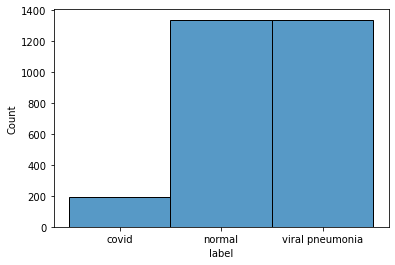

In [113]:
sns.histplot(all_df['label'])

In [112]:
df1 = pdcsv(os.path.join(DATA_DIR, "clean_covid.csv"))
df2 = pdcsv(os.path.join(DATA_DIR, "clean_normal.csv"))
df3 = pdcsv(os.path.join(DATA_DIR, "clean_vp.csv"))
all_df = pd.concat([df1, df2, df3])
all_df.to_csv(pjoin(DATA_DIR, 'data.csv'), index=False)

### 04, 05 that one paper

In [114]:
DATA_DIR4 = data_dirs[3]
DATA_DIR5 = data_dirs[4]
df4 = pdcsv(pjoin(DATA_DIR4, 'metadata.csv'))
df5 = pdcsv(pjoin(DATA_DIR5, 'meta.csv'))

In [148]:
df4 = df4[~pd.isna(df4['finding'])]
df5 = df5[~pd.isna(df5['finding'])]
df4['label'] = df4['finding']
df5['label'] = df5['finding']
df4['filepath'] = '/images/'+ df4['imagename']
df5['filepath'] = '/images/'+ df5['patientid'] + '.jpg'

&lt;AxesSubplot:xlabel=&#39;finding&#39;, ylabel=&#39;Count&#39;&gt;

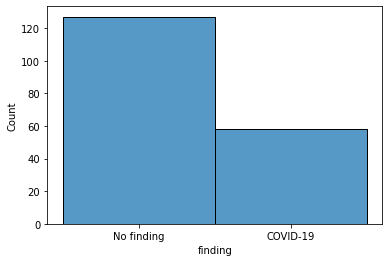

In [74]:
splot(df4['finding'])

&lt;AxesSubplot:xlabel=&#39;finding&#39;, ylabel=&#39;Count&#39;&gt;

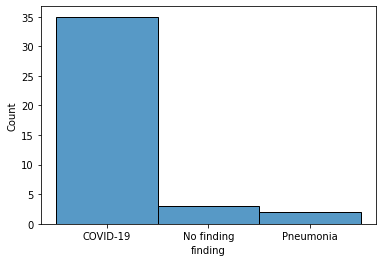

In [75]:
splot(df5['finding'])

In [129]:
df4_covid = df4[df4['finding'] == 'COVID-19']
remove_duplicate(DATA_DIR4, df4, pjoin(DATA_DIR4,'data.csv'))

KeyError: &#39;filepath&#39;

### 06 SIRM, italian dataset, but seems to be incorporated into 00 already
**Should have been covered in 03's winning dataset already **

### 07 Gradient Crescent

In [76]:
DATA_DIR = pjoin(data_dirs[6], 'all')
rows = []
for phase in os.listdir(DATA_DIR):
    for label in os.listdir(pjoin(DATA_DIR, phase)):
        for image in os.listdir(pjoin(DATA_DIR, phase, label)):
            filepath = os.path.join(phase, label, image)
            rows.append((filepath, label, phase))
df2 = pd.DataFrame(rows, columns=['filename', 'label', 'phase'])
df2.to_csv(os.path.join(DATA_DIR, 'data.csv'), index=False)

&lt;AxesSubplot:xlabel=&#39;label&#39;, ylabel=&#39;Count&#39;&gt;

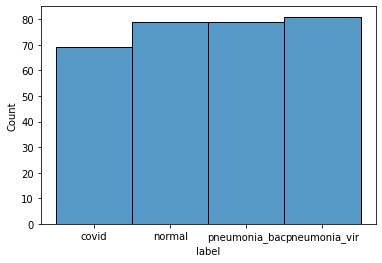

In [77]:
splot(df2['label'])

### 5K dataset

In [100]:
DATA_DIR = pjoin(data_dirs[7])
rows = []
for phase in os.listdir(DATA_DIR):
    if phase == 'data.csv':
        continue
    for label in os.listdir(pjoin(DATA_DIR, phase)):
        for image in os.listdir(pjoin(DATA_DIR, phase, label)):
            if label == 'non' and phase == 'test':
                sublabel = image
                for image in os.listdir(pjoin(DATA_DIR, phase, label, image)):
                    filepath = os.path.join(phase, label, sublabel, image)
                    rows.append((filepath, sublabel, phase))
            else:
                filepath = os.path.join(phase, label, image)
                if label ==  'non' and phase == 'train':
                    label = image.split('-')[0]
                rows.append((filepath, label, phase))
df2 = pd.DataFrame(rows, columns=['filename', 'label', 'phase'])
df2.to_csv(os.path.join(DATA_DIR, 'data.csv'), index=False)

&lt;AxesSubplot:xlabel=&#39;label&#39;, ylabel=&#39;Count&#39;&gt;

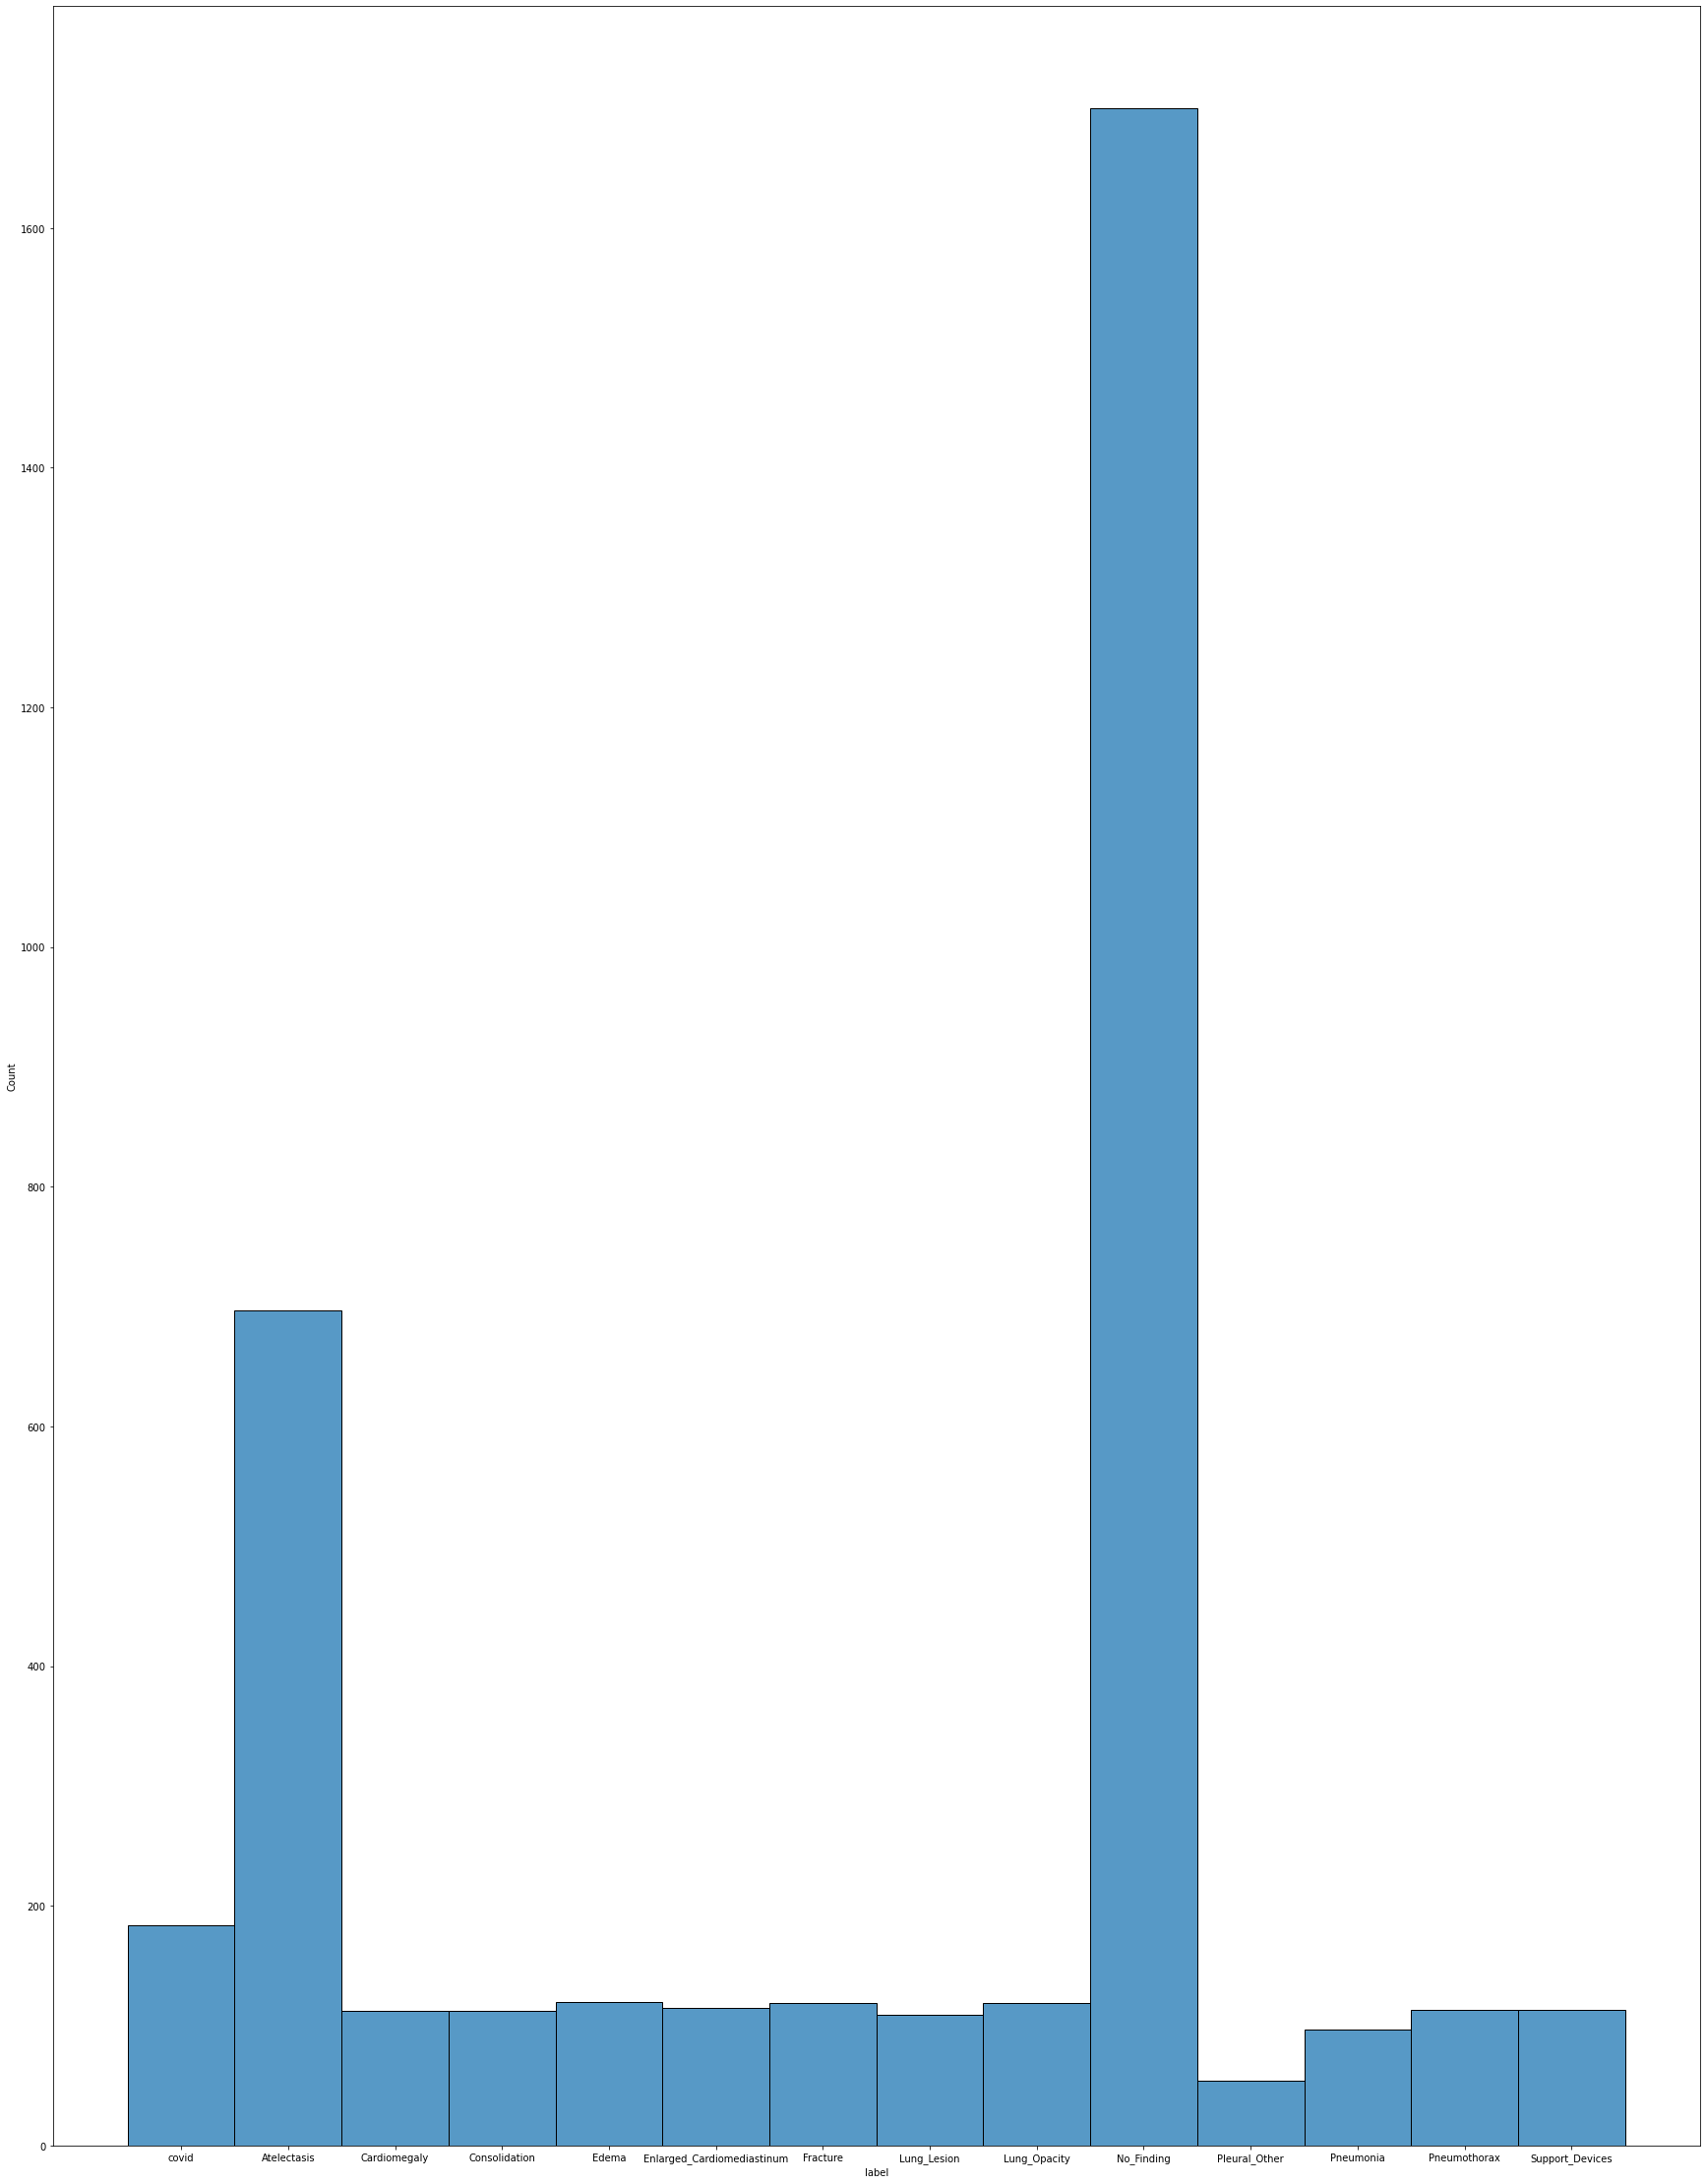

In [101]:
fig = plt.figure(figsize=(30,40))

splot(df2['label'])